## LA vs. Fresno
The distributions of March-April unemployment rates do not differ significantly between Fresno and LA.

Fresno  
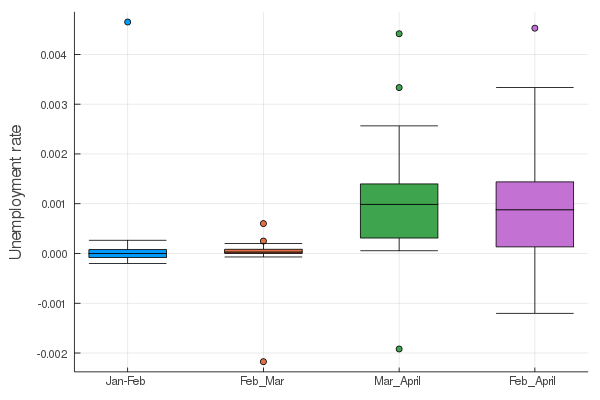  
LA
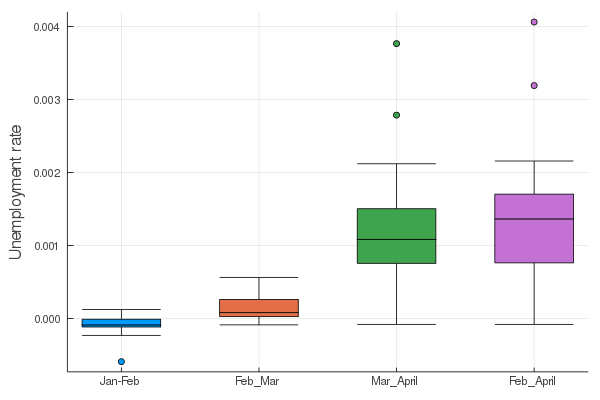

Fresno sector rates are, however, generally lower than their equivalent LA ones (with a few exceptions).
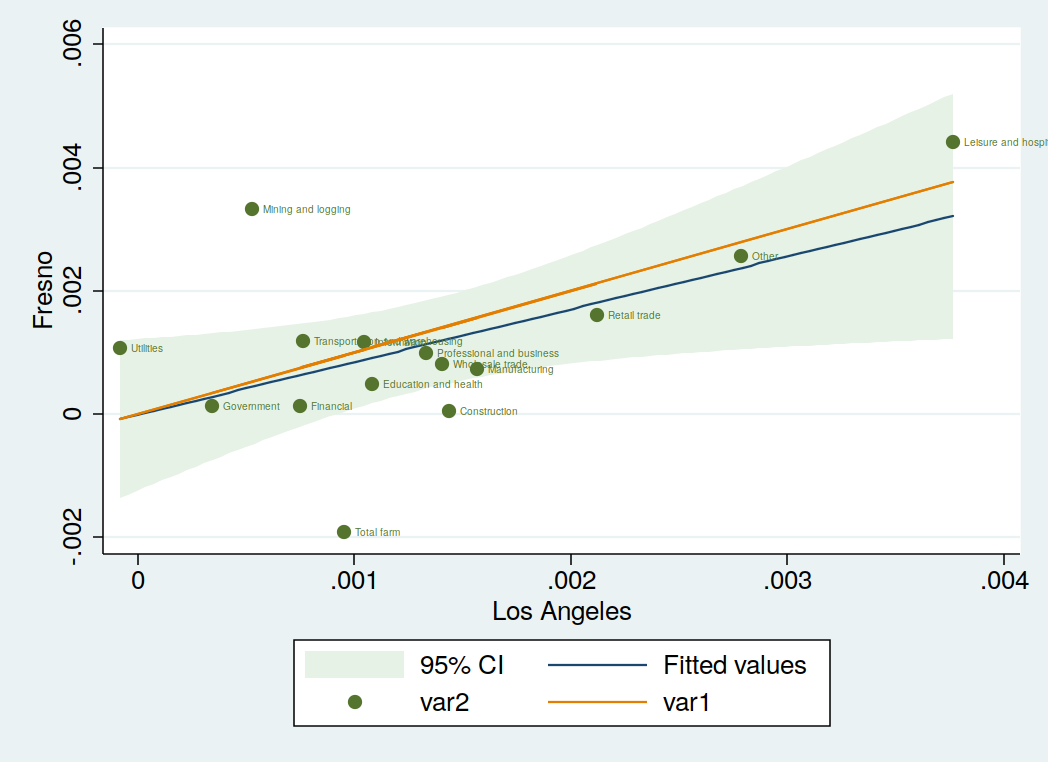  
The difference is that a collapse is forecast for LA, but a steep recession only for Fresno.
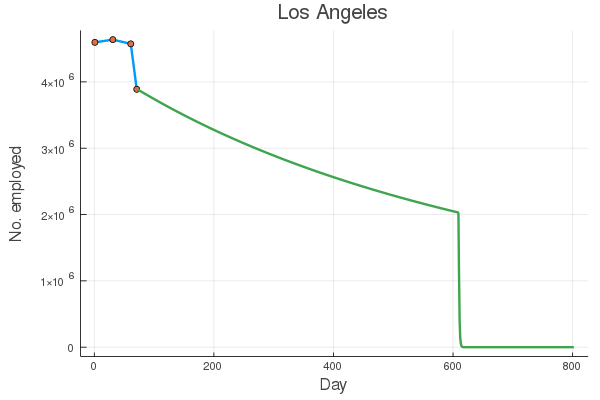
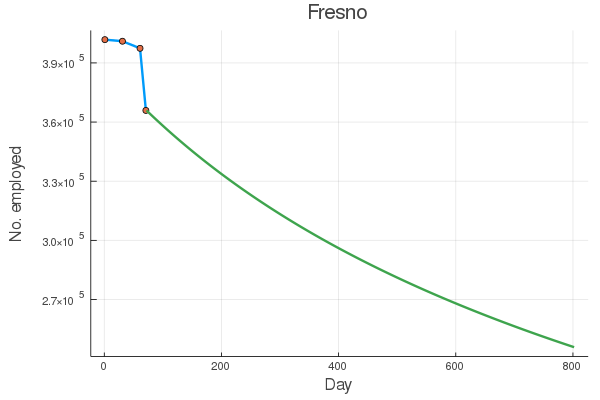
Swapping the rate vectors between cities changes the dynamics predictably. LA March-April rates forecast a sudden collapse, whereas Fresno rates forecast a steep but non-collapsing recession, regardless of which city they are applied to. 
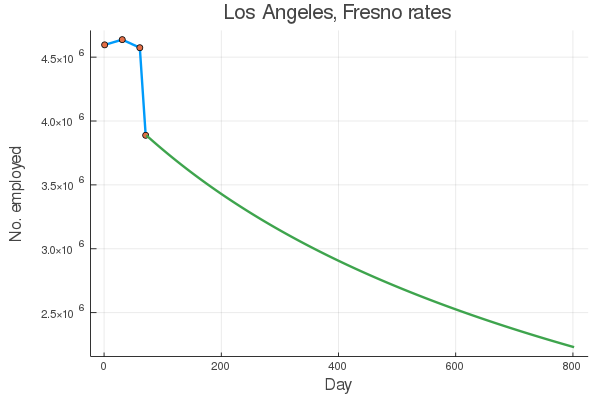
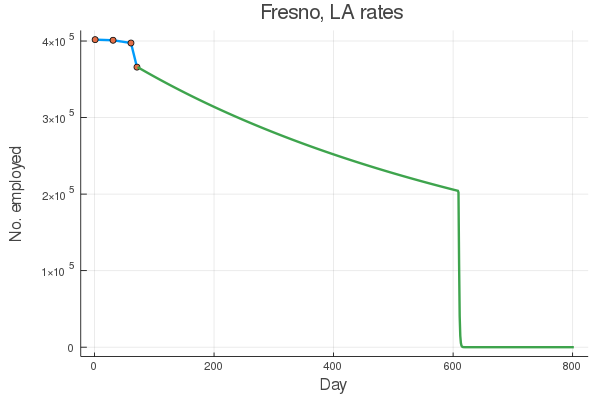

Clearly, the different forecasts are not dependent on the SES, but instead the perturbation vector. It would seem then that the different outcomes are caused by slight increases in some or all of the rates. How do we determine which ones are critical? Both the nonlinearity and non-uniformity of the system results from its complexity, and sorting this out might be quite challenging.

We begin by examining the total weight of each sector in the input-output $I$ matrix. Which sectors contribute most heavily overall?

In [1]:
I = [0.0 0.0362087 0.0179644 0.0117278 0.376428 0.146302 0.0081083 0.0662699 0.0190046 0.181641 0.0965441 0.000527957 0.00862731 0.00902321 0.0216225; 0.0179622 0.0 0.0220767 0.0166201 0.313975 0.0699321 0.00485752 0.0692652 0.034183 0.181282 0.224899 0.000442945 0.0115519 0.00937787 0.0235747; 0.0122537 0.147759 0.0 0.0306113 0.213831 0.0498549 0.0120094 0.118999 0.0353084 0.118697 0.181254 0.00123694 0.0166741 0.00822646 0.0532849; 0.0254843 0.0455196 0.0100785 0.0 0.427401 0.0905166 0.0603701 0.0489537 0.0253488 0.0973666 0.134706 0.00058025 0.00741011 0.0111683 0.0150958; 0.116661 0.15557 0.0233996 0.0116845 0.0 0.162723 0.00942322 0.0995589 0.0357808 0.120599 0.204489 0.000690378 0.0128792 0.0147439 0.0317968; 0.00870738 0.0130315 0.0166428 0.00922099 0.146517 0.0 0.00386072 0.087959 0.060379 0.235572 0.33 0.00243418 0.0201404 0.0297476 0.0357868; 0.0108482 0.0127908 0.0293178 0.0121981 0.130405 0.0421866 0.0 0.0831736 0.0568101 0.277948 0.265355 0.0057905 0.0188808 0.0217047 0.0325903; 0.0150862 0.0223006 0.0196488 0.0147035 0.259985 0.0578479 0.019065 0.0 0.0447534 0.22616 0.196005 0.00122443 0.0321246 0.026304 0.0647919; 0.0130214 0.0188445 0.0110726 0.00871738 0.220204 0.0515643 0.00354787 0.046826 0.0 0.173357 0.345517 0.000916938 0.0599845 0.0154777 0.0309489; 0.00974746 0.017279 0.0469474 0.0787678 0.15756 0.0390768 0.0117689 0.0436322 0.07986 0.0 0.382168 0.000898771 0.0482703 0.0254862 0.0585373; 0.0164069 0.0200448 0.0167279 0.0110118 0.224888 0.0508392 0.00629361 0.0663088 0.135278 0.324745 0.0 0.0015566 0.0637652 0.0286803 0.0334549; 0.012568 0.0180521 0.013969 0.00828926 0.214989 0.0539842 0.00328267 0.0353986 0.0552257 0.251724 0.246855 0.0 0.0410903 0.0202522 0.0243197; 0.021388 0.0207064 0.0298287 0.010494 0.218703 0.051308 0.0106059 0.0366145 0.0526544 0.226998 0.265638 0.00238808 0.0 0.0223186 0.0303544; 0.0148292 0.0216456 0.0127158 0.0137089 0.24984 0.0525413 0.0202541 0.0359499 0.0641255 0.247642 0.202325 0.00764987 0.0255169 0.0 0.0312556; 0.0215736 0.0396323 0.0147264 0.0425002 0.330161 0.0636427 0.00493458 0.0534372 0.066727 0.127654 0.186386 0.0116591 0.0169129 0.0200532 0.0]

15×15 Array{Float64,2}:
 0.0         0.0362087  0.0179644  …  0.00862731  0.00902321  0.0216225
 0.0179622   0.0        0.0220767     0.0115519   0.00937787  0.0235747
 0.0122537   0.147759   0.0           0.0166741   0.00822646  0.0532849
 0.0254843   0.0455196  0.0100785     0.00741011  0.0111683   0.0150958
 0.116661    0.15557    0.0233996     0.0128792   0.0147439   0.0317968
 0.00870738  0.0130315  0.0166428  …  0.0201404   0.0297476   0.0357868
 0.0108482   0.0127908  0.0293178     0.0188808   0.0217047   0.0325903
 0.0150862   0.0223006  0.0196488     0.0321246   0.026304    0.0647919
 0.0130214   0.0188445  0.0110726     0.0599845   0.0154777   0.0309489
 0.00974746  0.017279   0.0469474     0.0482703   0.0254862   0.0585373
 0.0164069   0.0200448  0.0167279  …  0.0637652   0.0286803   0.0334549
 0.012568    0.0180521  0.013969      0.0410903   0.0202522   0.0243197
 0.021388    0.0207064  0.0298287     0.0         0.0223186   0.0303544
 0.0148292   0.0216456  0.0127158     0.

In [3]:
sum_I = sum(I,dims=1)
print(sum_I)

[0.316538 0.589385 0.285116 0.280256 3.48489 0.98232 0.178382 0.892346 0.765439 2.79139 3.26214 0.0379969 0.383829 0.262564 0.487415]

Three sectors stand out as having input 1-2 orders of magnitude greater than the others. 

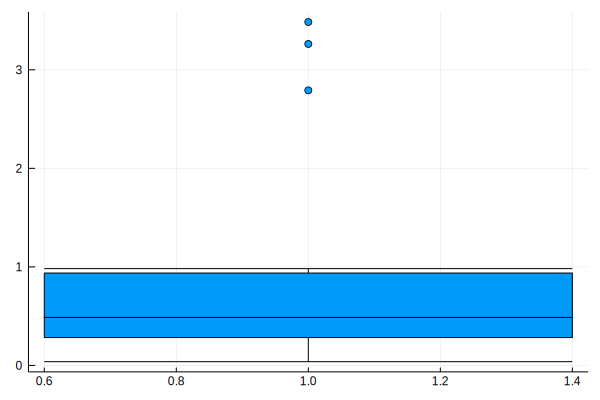

In [6]:
using StatsPlots
boxplot(sum_I[1,:],leg=false)

These are Manufacturing, Financial services, and Professional and Business services.

Is there a way to determine which subset (if not all) sector rates are responsible for the regime shift? One approach might be to substitute LA rates one at a time into the Fresno p-matrix. Another might be to simulate a partial differential approach by holding all rates but one constant, and for that one, incrementally transforming its Fresno value to the LA value.

## Rate substitutions
In the following analyses, the LA rates of the three weightiest sectors were substituted into the Fresno p-matrix. Both Manufacturing, and Financial services, will generate a tipping point within the simulated time, but not Professional services, although the latter is the second most heavily weighted sector. This points to the complexity of the sector network, captured by the matrix. Also, note that neither tipping sector collapses the system at the threshold that occurs when the matrix is fully replaced by the LA one. Clearly multiple sector interactions and feedbacks are at work.
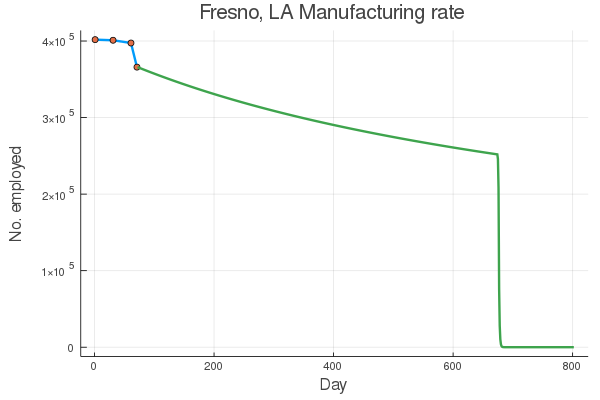
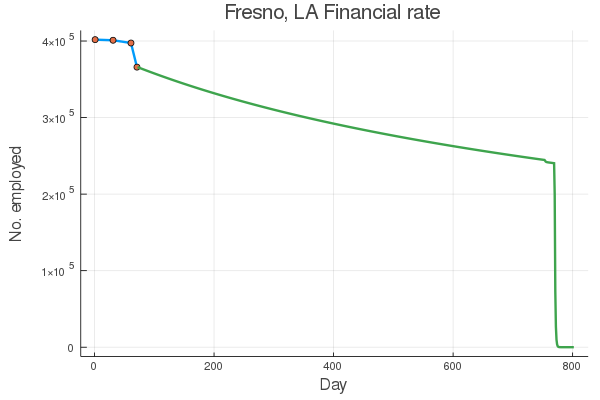
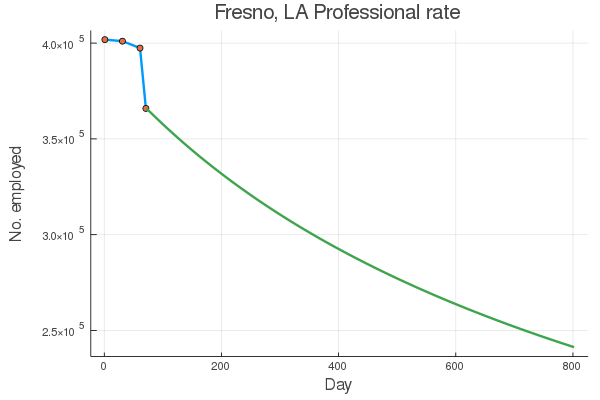